
0: 480x640 1 , 80.1ms
Speed: 3.0ms preprocess, 80.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


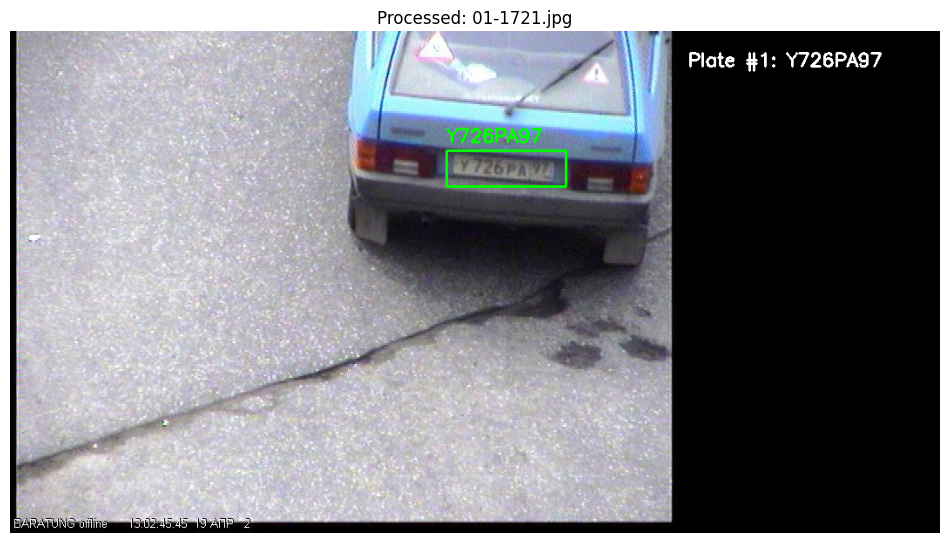


0: 480x640 1 , 80.1ms
Speed: 2.0ms preprocess, 80.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


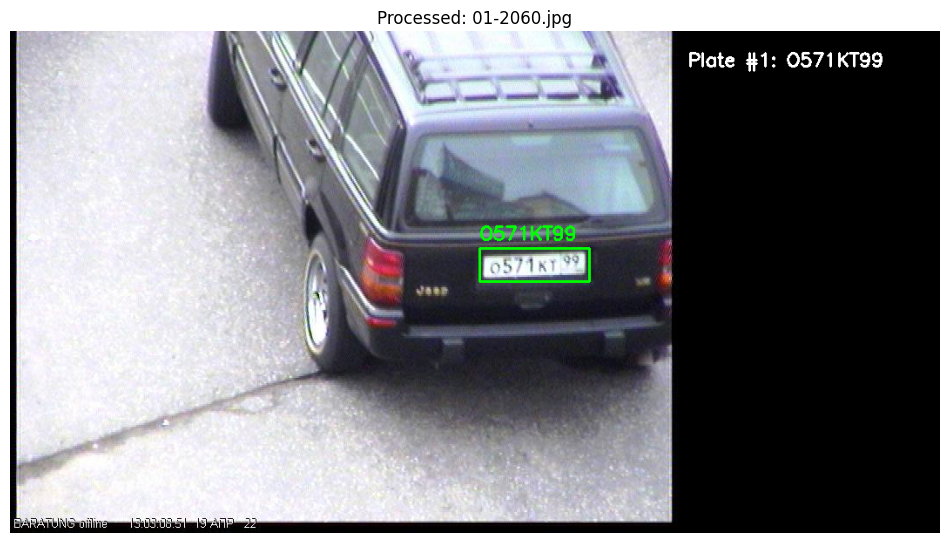


0: 480x640 1 , 100.1ms
Speed: 2.0ms preprocess, 100.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


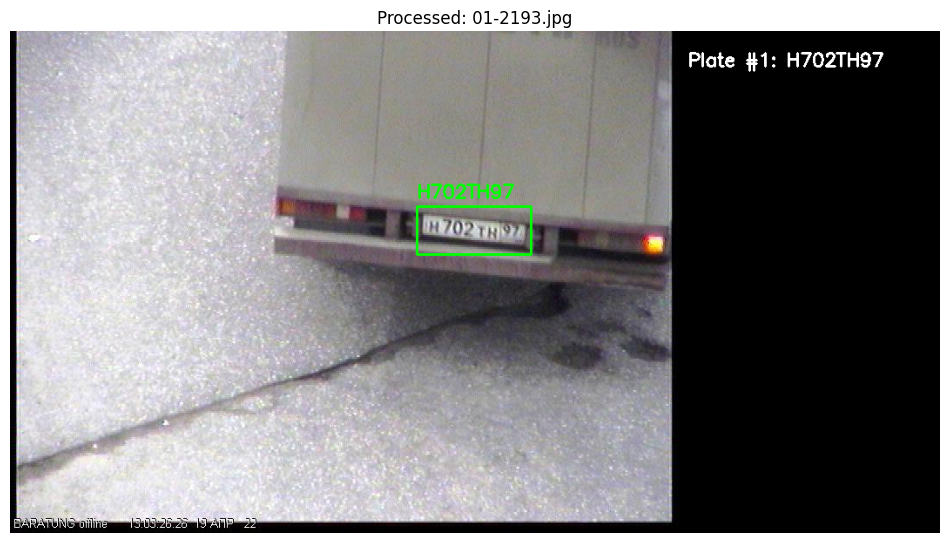


0: 480x640 1 , 76.1ms
Speed: 1.0ms preprocess, 76.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


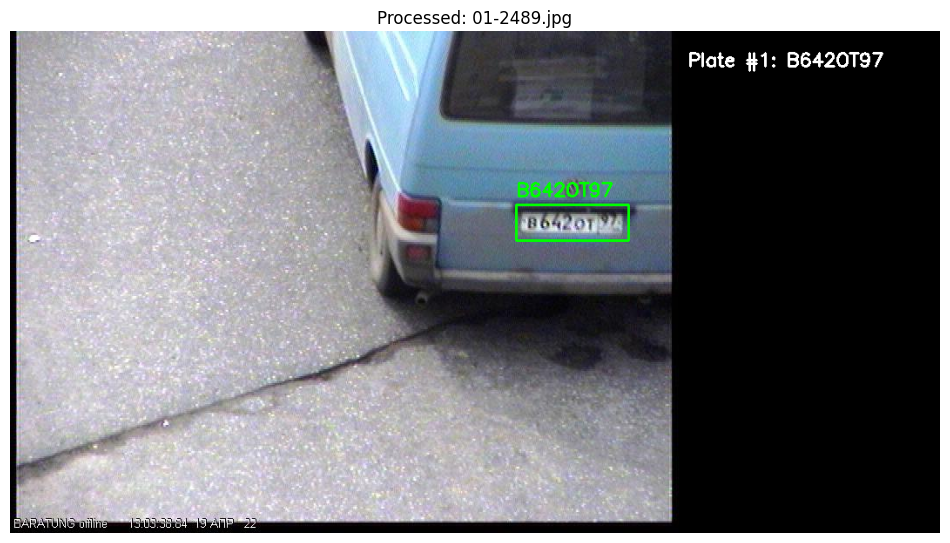


0: 480x640 1 , 85.1ms
Speed: 2.0ms preprocess, 85.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


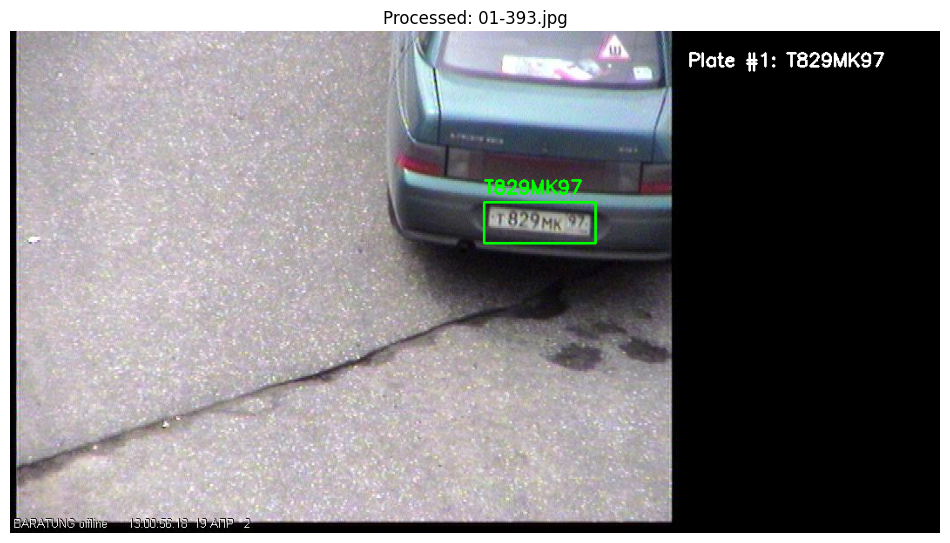


0: 480x640 1 , 74.3ms
Speed: 2.0ms preprocess, 74.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


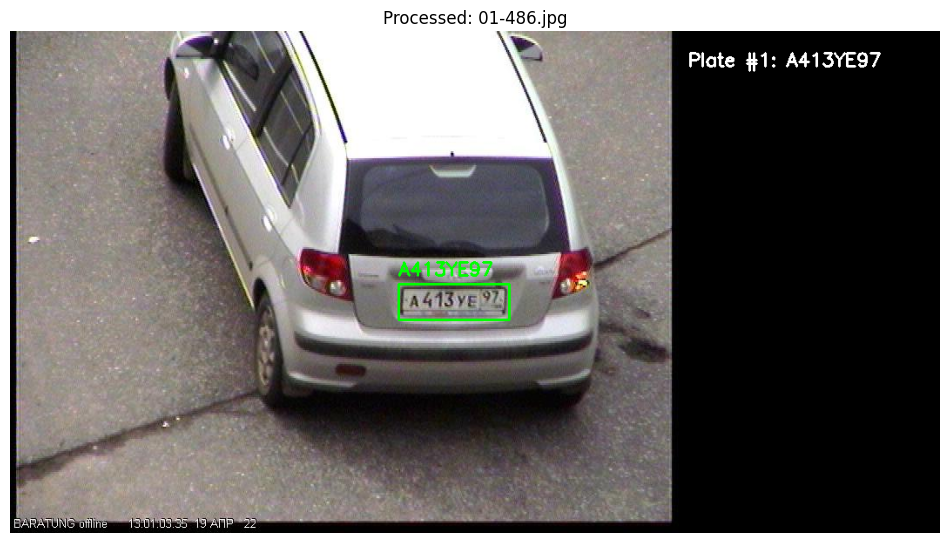


0: 480x640 1 , 87.6ms
Speed: 1.0ms preprocess, 87.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


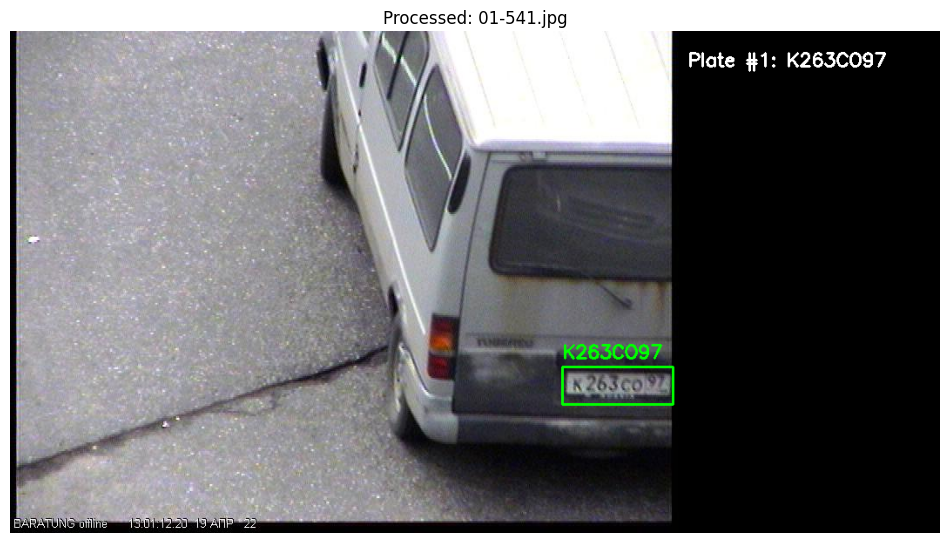


0: 480x640 1 , 73.1ms
Speed: 2.0ms preprocess, 73.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


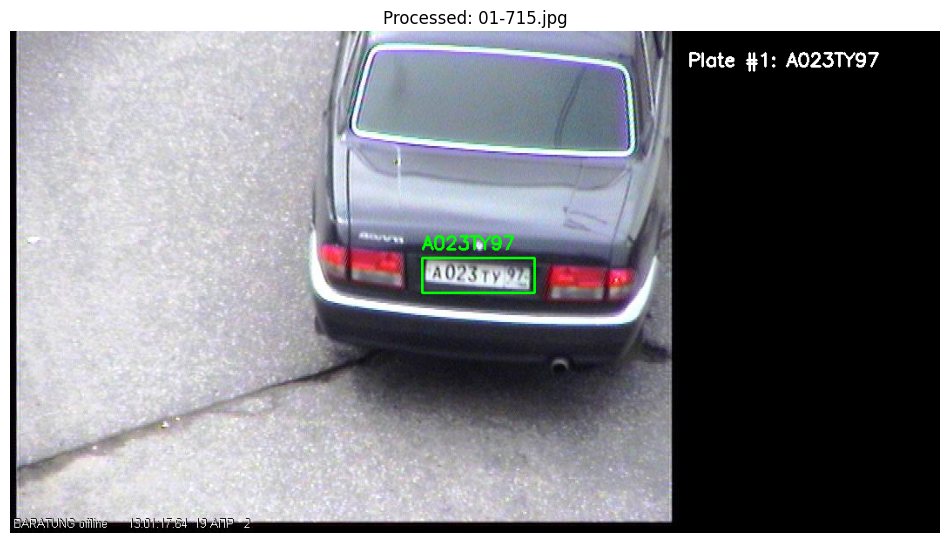

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

from config import NUM_CLASSES, CRNN_WEIGHTS_PATH, YOLO_WEIGHTS_PATH
from license_plate_recognizer import LicensePlateRecognizer

def process_images_in_folder(folder_path, yolo_weights_path, crnn_weights_path):
    lpr = LicensePlateRecognizer(
        yolo_model_path=yolo_weights_path,
        crnn_model_path=crnn_weights_path,
        num_classes=NUM_CLASSES,
        device="cpu"
    )
    
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not image_files:
        print("В указанной папке нет изображений.")
        return

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Не удалось загрузить изображение: {image_file}")
            continue
        
        detections = lpr.detect_and_recognize_frame(image, padding=5)
        
        display_image = image.copy()

        for det in detections:
            x1, y1, x2, y2 = det["bbox"]
            text = det["text"]

            cv2.rectangle(display_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(
                display_image, text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2
            )

        height, width, _ = display_image.shape
        black_bar_width = 300
        black_bar = np.zeros((height, black_bar_width, 3), dtype=np.uint8)

        y_start = 40
        for i, det in enumerate(detections):
            txt = det["text"]
            cv2.putText(
                black_bar,
                f"Plate #{i+1}: {txt}",
                (10, y_start),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (255, 255, 255), 2
            )
            y_start += 40

        display_image = np.hstack((display_image, black_bar))

        display_image_rgb = cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12, 8))
        plt.imshow(display_image_rgb)
        plt.title(f"Processed: {image_file}")
        plt.axis("off")
        plt.show()


if __name__ == "__main__":
    folder_path = "img"  # Укажите путь к папке с изображениями

    process_images_in_folder(folder_path, YOLO_WEIGHTS_PATH, CRNN_WEIGHTS_PATH)
